In [1]:
!pip install pandas

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

In [3]:
import os

In [4]:
import numpy as np


In [5]:
import seaborn as sns
import sklearn
import plotly

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
pwd

'C:\\Users\\USER\\Desktop\\New folder'

In [8]:
df = pd.read_csv("Demo_Data_Loan.csv")

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [10]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,0
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural,0


In [11]:
df.shape

(367, 13)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan Approved      367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


In [13]:
df.describe

<bound method NDFrame.describe of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0 

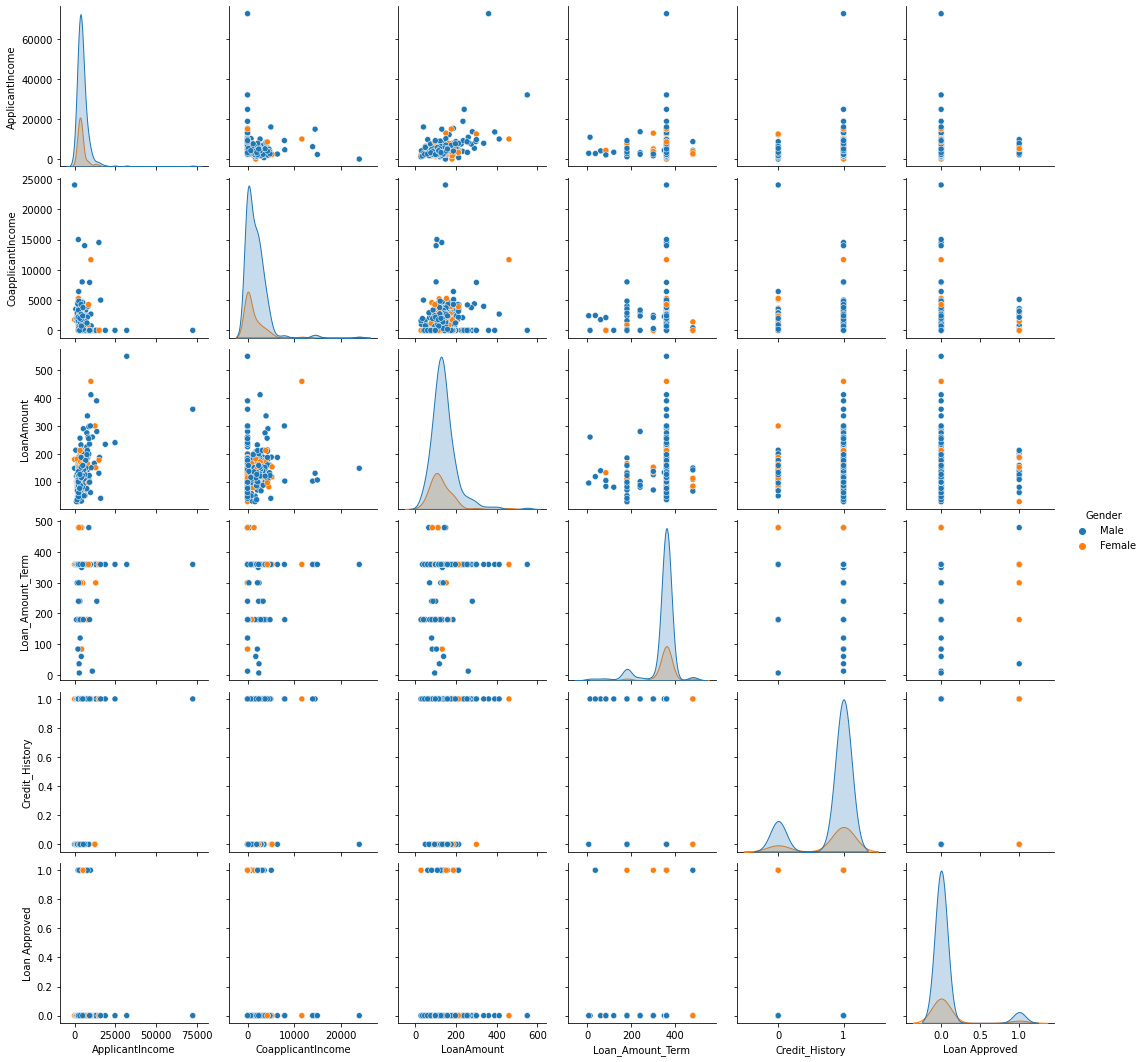

In [14]:
sns.pairplot(df, hue='Gender')

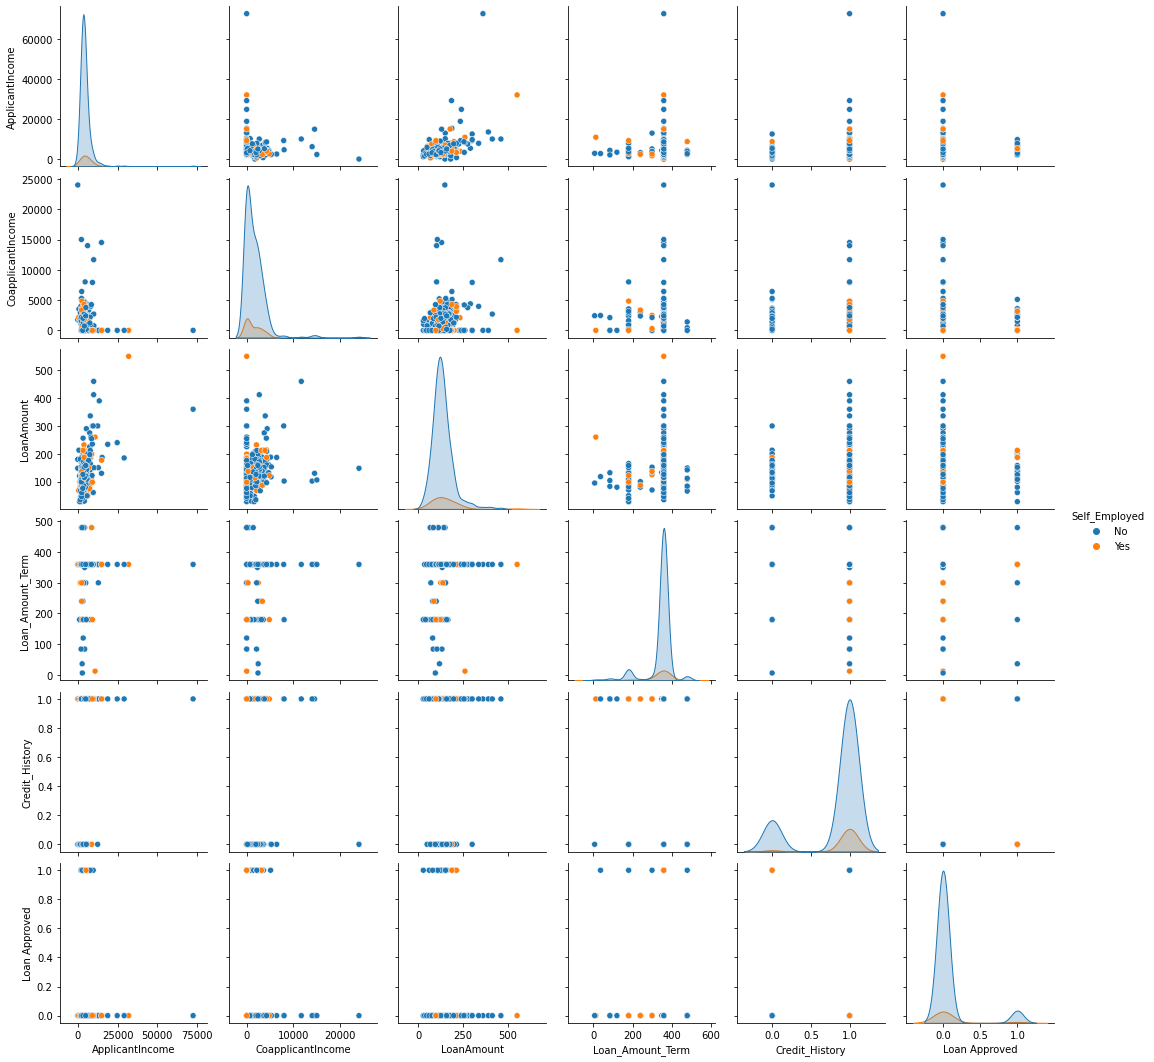

In [15]:
sns.pairplot(df, hue='Self_Employed')

In [16]:
df1 = pd.read_csv("Demo_Data_Loan.csv", usecols=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban


In [17]:
for col in df1.columns:
    print(col, ': ',len(df1[col].unique()),'labels')

Loan_ID :  367 labels
Gender :  3 labels
Married :  2 labels
Dependents :  5 labels
Education :  2 labels
Self_Employed :  3 labels
Property_Area :  3 labels


In [18]:
df1.Loan_ID.value_counts().sort_values(ascending=False).head(20)

LP001015    1
LP001135    1
LP001031    1
LP001035    1
LP001051    1
LP001054    1
LP001055    1
LP001056    1
LP001059    1
LP001067    1
LP001078    1
LP001082    1
LP001083    1
LP001094    1
LP001096    1
LP001099    1
LP001105    1
LP001107    1
LP001108    1
LP001115    1
Name: Loan_ID, dtype: int64

In [19]:
top_10 = [x for x in df1.Loan_ID.value_counts().sort_values(ascending=False).head(10).index]
top_10

['LP001015',
 'LP001135',
 'LP001031',
 'LP001035',
 'LP001051',
 'LP001054',
 'LP001055',
 'LP001056',
 'LP001059',
 'LP001067']

In [20]:
for label in top_10:
    df1[label] = np.where(df1['Loan_ID']==label, 1, 0)
df1[['Loan_ID']+top_10].head(40)

,Loan_ID,LP001015,LP001135,LP001031,LP001035,LP001051,LP001054,LP001055,LP001056,LP001059,LP001067
0,LP001015,1,0,0,0,0,0,0,0,0,0
1,LP001022,0,0,0,0,0,0,0,0,0,0
2,LP001031,0,0,1,0,0,0,0,0,0,0
3,LP001035,0,0,0,1,0,0,0,0,0,0
4,LP001051,0,0,0,0,1,0,0,0,0,0
5,LP001054,0,0,0,0,0,1,0,0,0,0
6,LP001055,0,0,0,0,0,0,1,0,0,0
7,LP001056,0,0,0,0,0,0,0,1,0,0
8,LP001059,0,0,0,0,0,0,0,0,1,0
9,LP001067,0,0,0,0,0,0,0,0,0,1


In [21]:
def one_hot_top_x(data, variable, top_x_labels):
     
        for label in top_x_labels:
            data[variable+'_'+label] = np.where(df1[variable]==label, 1, 0)
            
df1 = pd.read_csv("Demo_Data_Loan.csv", usecols=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'])


one_hot_top_x(df1, 'Loan_ID', top_10)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067
0,LP001015,Male,Yes,0,Graduate,No,Urban,1,0,0,0,0,0,0,0,0,0
1,LP001022,Male,Yes,1,Graduate,No,Urban,0,0,0,0,0,0,0,0,0,0
2,LP001031,Male,Yes,2,Graduate,No,Urban,0,0,1,0,0,0,0,0,0,0
3,LP001035,Male,Yes,2,Graduate,No,Urban,0,0,0,1,0,0,0,0,0,0
4,LP001051,Male,No,0,Not Graduate,No,Urban,0,0,0,0,1,0,0,0,0,0


In [22]:
top_10 = [x for x in df1.Gender.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(df1, 'Gender', top_10)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067,Gender_Male,Gender_Female
0,LP001015,Male,Yes,0,Graduate,No,Urban,1,0,0,0,0,0,0,0,0,0,1,0
1,LP001022,Male,Yes,1,Graduate,No,Urban,0,0,0,0,0,0,0,0,0,0,1,0
2,LP001031,Male,Yes,2,Graduate,No,Urban,0,0,1,0,0,0,0,0,0,0,1,0
3,LP001035,Male,Yes,2,Graduate,No,Urban,0,0,0,1,0,0,0,0,0,0,1,0
4,LP001051,Male,No,0,Not Graduate,No,Urban,0,0,0,0,1,0,0,0,0,0,1,0


In [23]:
top_10 = [x for x in df1.Married.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(df1, 'Married', top_10)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,...,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067,Gender_Male,Gender_Female,Married_Yes,Married_No
0,LP001015,Male,Yes,0,Graduate,No,Urban,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,LP001022,Male,Yes,1,Graduate,No,Urban,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,LP001031,Male,Yes,2,Graduate,No,Urban,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,LP001035,Male,Yes,2,Graduate,No,Urban,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,LP001051,Male,No,0,Not Graduate,No,Urban,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [24]:
top_10 = [x for x in df1.Dependents.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(df1, 'Dependents', top_10)
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,...,Loan_ID_LP001059,Loan_ID_LP001067,Gender_Male,Gender_Female,Married_Yes,Married_No,Dependents_0,Dependents_2,Dependents_1,Dependents_3+
0,LP001015,Male,Yes,0,Graduate,No,Urban,1,0,0,...,0,0,1,0,1,0,1,0,0,0
1,LP001022,Male,Yes,1,Graduate,No,Urban,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,LP001031,Male,Yes,2,Graduate,No,Urban,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,LP001035,Male,Yes,2,Graduate,No,Urban,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,LP001051,Male,No,0,Not Graduate,No,Urban,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5,LP001054,Male,Yes,0,Not Graduate,Yes,Urban,0,0,0,...,0,0,1,0,1,0,1,0,0,0
6,LP001055,Female,No,1,Not Graduate,No,Semiurban,0,0,0,...,0,0,0,1,0,1,0,0,1,0
7,LP001056,Male,Yes,2,Not Graduate,No,Rural,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8,LP001059,Male,Yes,2,Graduate,NaN,Urban,0,0,0,...,1,0,1,0,1,0,0,1,0,0
9,LP001067,Male,No,0,Not Graduate,No,Semiurban,0,0,0,...,0,1,1,0,0,1,1,0,0,0


In [25]:
top_10 = [x for x in df1.Education.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(df1, 'Education', top_10)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,...,Gender_Male,Gender_Female,Married_Yes,Married_No,Dependents_0,Dependents_2,Dependents_1,Dependents_3+,Education_Graduate,Education_Not Graduate
0,LP001015,Male,Yes,0,Graduate,No,Urban,1,0,0,...,1,0,1,0,1,0,0,0,1,0
1,LP001022,Male,Yes,1,Graduate,No,Urban,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,LP001031,Male,Yes,2,Graduate,No,Urban,0,0,1,...,1,0,1,0,0,1,0,0,1,0
3,LP001035,Male,Yes,2,Graduate,No,Urban,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,LP001051,Male,No,0,Not Graduate,No,Urban,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [26]:
top_10 = [x for x in df1.Self_Employed.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(df1, 'Self_Employed', top_10)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,...,Married_Yes,Married_No,Dependents_0,Dependents_2,Dependents_1,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,LP001015,Male,Yes,0,Graduate,No,Urban,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,LP001022,Male,Yes,1,Graduate,No,Urban,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,LP001031,Male,Yes,2,Graduate,No,Urban,0,0,1,...,1,0,0,1,0,0,1,0,1,0
3,LP001035,Male,Yes,2,Graduate,No,Urban,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,LP001051,Male,No,0,Not Graduate,No,Urban,0,0,0,...,0,1,1,0,0,0,0,1,1,0


In [27]:
top_10 = [x for x in df1.Property_Area.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(df1, 'Property_Area', top_10)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,...,Dependents_2,Dependents_1,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Urban,Property_Area_Semiurban,Property_Area_Rural
0,LP001015,Male,Yes,0,Graduate,No,Urban,1,0,0,...,0,0,0,1,0,1,0,1,0,0
1,LP001022,Male,Yes,1,Graduate,No,Urban,0,0,0,...,0,1,0,1,0,1,0,1,0,0
2,LP001031,Male,Yes,2,Graduate,No,Urban,0,0,1,...,1,0,0,1,0,1,0,1,0,0
3,LP001035,Male,Yes,2,Graduate,No,Urban,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4,LP001051,Male,No,0,Not Graduate,No,Urban,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [28]:
df1.drop('Loan_ID',axis=1,inplace=True)
df1.drop('Gender',axis=1,inplace=True)
df1.drop('Married',axis=1,inplace=True)
df1.drop('Dependents',axis=1,inplace=True)
df1.drop('Education',axis=1,inplace=True)
df1.drop('Self_Employed',axis=1,inplace=True)
df1.drop('Property_Area',axis=1,inplace=True)

df1.head(10)

,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067,...,Dependents_2,Dependents_1,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Urban,Property_Area_Semiurban,Property_Area_Rural
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1
8,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0


In [29]:
df.drop('Loan_ID',axis=1,inplace=True)
df.drop('Gender',axis=1,inplace=True)
df.drop('Married',axis=1,inplace=True)
df.drop('Dependents',axis=1,inplace=True)
df.drop('Education',axis=1,inplace=True)
df.drop('Self_Employed',axis=1,inplace=True)
df.drop('Property_Area',axis=1,inplace=True)

df.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
0,5720,0,110.0,360.0,1.0,0
1,3076,1500,126.0,360.0,1.0,0
2,5000,1800,208.0,360.0,1.0,0
3,2340,2546,100.0,360.0,NaN,0
4,3276,0,78.0,360.0,1.0,0
5,2165,3422,152.0,360.0,1.0,0
6,2226,0,59.0,360.0,1.0,0
7,3881,0,147.0,360.0,0.0,0
8,13633,0,280.0,240.0,1.0,0
9,2400,2400,123.0,360.0,1.0,0


In [30]:
df=pd.concat([df1,df],axis=1)
df.head(10)

,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067,...,Self_Employed_Yes,Property_Area_Urban,Property_Area_Semiurban,Property_Area_Rural,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,5720,0,110.0,360.0,1.0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,3076,1500,126.0,360.0,1.0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,5000,1800,208.0,360.0,1.0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,2340,2546,100.0,360.0,NaN,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,3276,0,78.0,360.0,1.0,0
5,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,2165,3422,152.0,360.0,1.0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,2226,0,59.0,360.0,1.0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,3881,0,147.0,360.0,0.0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,13633,0,280.0,240.0,1.0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,2400,2400,123.0,360.0,1.0,0


In [31]:
df.isnull().sum()

Loan_ID_LP001015            0
Loan_ID_LP001135            0
Loan_ID_LP001031            0
Loan_ID_LP001035            0
Loan_ID_LP001051            0
Loan_ID_LP001054            0
Loan_ID_LP001055            0
Loan_ID_LP001056            0
Loan_ID_LP001059            0
Loan_ID_LP001067            0
Gender_Male                 0
Gender_Female               0
Married_Yes                 0
Married_No                  0
Dependents_0                0
Dependents_2                0
Dependents_1                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Urban         0
Property_Area_Semiurban     0
Property_Area_Rural         0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Loan Approved               0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['LoanAmount']] = imputer.fit_transform(df[['LoanAmount']])
df[['Loan_Amount_Term']] = imputer.fit_transform(df[['Loan_Amount_Term']])
df[['Credit_History']] = imputer.fit_transform(df[['Credit_History']])

In [33]:
df.head(10)

,Loan_ID_LP001015,Loan_ID_LP001135,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067,...,Self_Employed_Yes,Property_Area_Urban,Property_Area_Semiurban,Property_Area_Rural,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,5720,0,110.0,360.0,1.000000,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,3076,1500,126.0,360.0,1.000000,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,5000,1800,208.0,360.0,1.000000,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,2340,2546,100.0,360.0,0.825444,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,3276,0,78.0,360.0,1.000000,0
5,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,2165,3422,152.0,360.0,1.000000,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,2226,0,59.0,360.0,1.000000,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,3881,0,147.0,360.0,0.000000,0
8,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,13633,0,280.0,240.0,1.000000,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,2400,2400,123.0,360.0,1.000000,0


<AxesSubplot:>

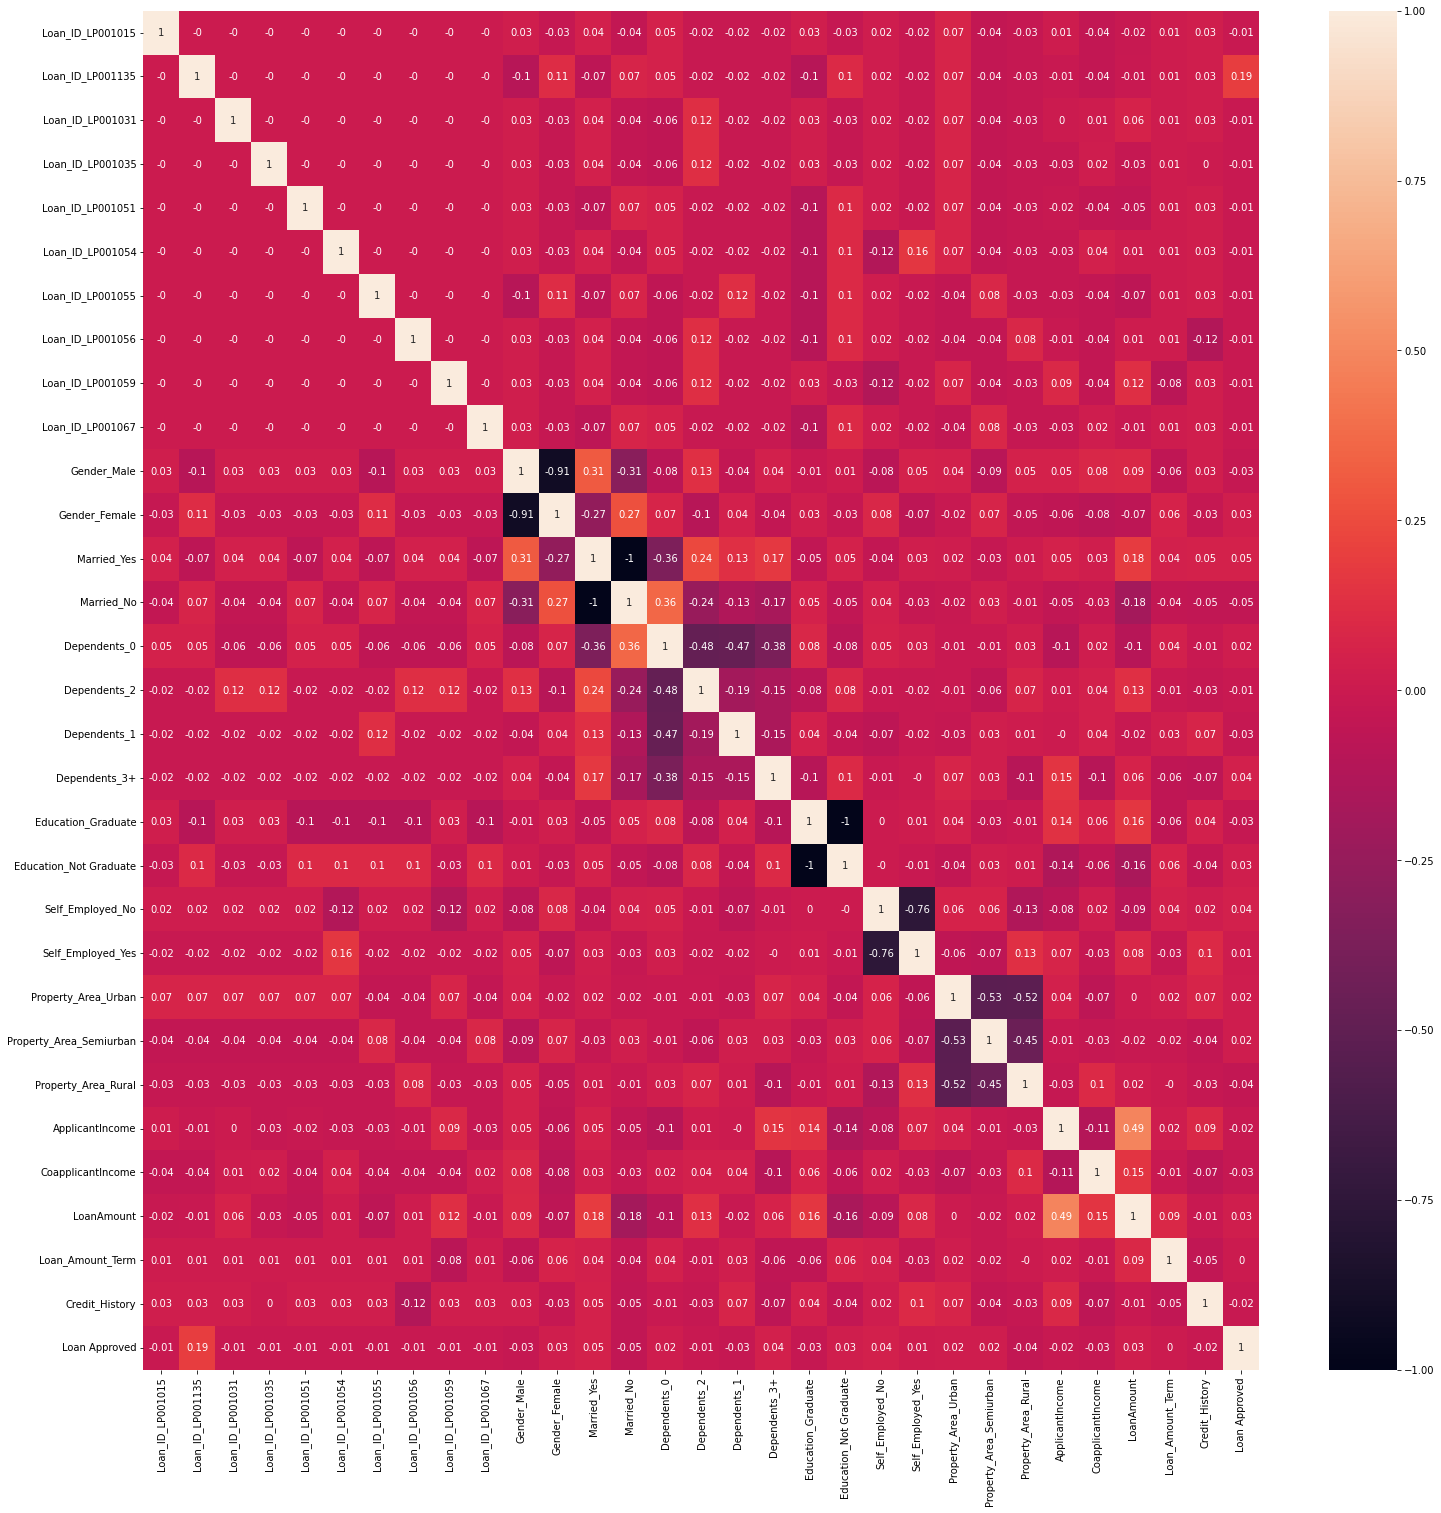

In [34]:
correlation_matrix = df.corr().round(2)
ax = plt.subplots(figsize=(25, 25))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [35]:
df.drop('Self_Employed_Yes',axis=1,inplace=True)

In [36]:
dependent = 'Self_Employed_No'

In [37]:
independent = df.columns.tolist()
independent.remove(dependent)
independent

['Loan_ID_LP001015',
 'Loan_ID_LP001135',
 'Loan_ID_LP001031',
 'Loan_ID_LP001035',
 'Loan_ID_LP001051',
 'Loan_ID_LP001054',
 'Loan_ID_LP001055',
 'Loan_ID_LP001056',
 'Loan_ID_LP001059',
 'Loan_ID_LP001067',
 'Gender_Male',
 'Gender_Female',
 'Married_Yes',
 'Married_No',
 'Dependents_0',
 'Dependents_2',
 'Dependents_1',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Property_Area_Urban',
 'Property_Area_Semiurban',
 'Property_Area_Rural',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan Approved']

In [38]:
X = df[independent]
Y = df[dependent]

In [39]:
Y.describe()

count    367.000000
mean       0.836512
std        0.370315
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Self_Employed_No, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state=0)


In [41]:
from sklearn.preprocessing import MinMaxScaler
from numpy import math
from pylab import*

In [42]:
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 20)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
print('''Evaluating Model Accuracy''')
classifier.score(X_test, Y_test)*100

Evaluating Model Accuracy


74.32432432432432

In [60]:
rmse = np.sqrt(np.mean((Y_test - y_pred)**2))

print("RMSE : {:.2f}".format(rmse))

RMSE : 0.51


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred) 

print('Mean_Absolute_Error: %2f'% mae)
print('Mean_Squared_Error: %2f'% mse)

Mean_Absolute_Error: 0.256757
Mean_Squared_Error: 0.256757


In [62]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,y_pred)
cm

array([[ 0, 14],
       [ 5, 55]], dtype=int64)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Setup arrays to store training and test accuracies
#neighbors = np.arange(1,9)
#train_accuracy =np.empty(len(neighbors))
#test_accuracy = np.empty(len(neighbors))

classifier = KNeighborsClassifier(n_neighbors=2, metric='minkowski',p=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [64]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1])

In [65]:
accuracy = classifier.score(X_test, Y_test)*100
accuracy

55.4054054054054

In [66]:
accuracy = classifier.score(X_train, Y_train)*100
accuracy

88.05460750853243

In [67]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,y_pred)
cm

array([[ 4, 10],
       [23, 37]], dtype=int64)

In [68]:
rmse = np.sqrt(np.mean((Y_test - y_pred)**2))

print("RMSE : {:.2f}".format(rmse))

RMSE : 0.67


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred) 

print('Mean_Absolute_Error: %2f'% mae)
print('Mean_Squared_Error: %2f'% mse)

Mean_Absolute_Error: 0.445946
Mean_Squared_Error: 0.445946
